## Importing Our Data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('sport_data.csv')

## Basic Data Analysis

In [ ]:
data.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [ ]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,Female,Basketball
14,19,6,Female,Basketball
15,13,3,Female,Hockey
16,14,4,Female,Hockey
17,14,3,Female,Hockey


In [ ]:
data.shape

(18, 4)

In [ ]:
data.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


## Pre-process data

In [ ]:
data['Sex'].replace(['Male','Female'],[1,0], inplace=True)

In [ ]:
data.head()

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball


In [ ]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,0,Basketball
14,19,6,0,Basketball
15,13,3,0,Hockey
16,14,4,0,Hockey
17,14,3,0,Hockey


## Split data into training and testing parts

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns='Sport')

In [ ]:
X.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [ ]:
y = data.drop(columns=['Age','Height','Sex'])

In [ ]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

## Model Building

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

## Test The Model

In [ ]:
test = clf.predict(X_test)

In [ ]:
test

array(['Basketball', 'Basketball', 'Basketball', 'Soccer', 'Soccer',
       'Hockey'], dtype=object)

In [ ]:
y_test

,Sport
5,Basketball
4,Basketball
12,Basketball
13,Basketball
1,Soccer
6,Hockey


## Checking Efficacy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy = accuracy_score(y_test,test)

In [ ]:
accuracy

0.8333333333333334

In [ ]:
new_stu = clf.predict([[15,4,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
new_stu

array(['Hockey'], dtype=object)

## Save The Model

In [ ]:
import joblib

In [ ]:
joblib.dump(clf, 'sport_model.joblib')

['sport_model.joblib']

## More Data Analysis on Building Model

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[3, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


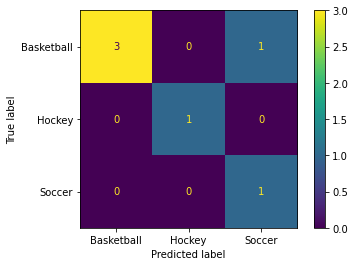

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

  Basketball       1.00      0.75      0.86         4
      Hockey       1.00      1.00      1.00         1
      Soccer       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.83      0.92      0.84         6
weighted avg       0.92      0.83      0.85         6

